In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## About Columns :
Diabetes_binary : you have diabetes (0,1)

HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

CholCheck : Cholesterol check within past five years (0,1)

BMI : Body Mass Index (BMI)

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

Stroke : (Ever told) you had a stroke. (0,1)

HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

Fruits : Consume Fruit 1 or more times per day (0,1)

Veggies : Consume Vegetables 1 or more times per day (0,1)

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

GenHlth : Would you say that in general your health is: rate (1 ~ 5)

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

Sex : Indicate sex of respondent (0,1) (Female or Male)

Age : Fourteen-level age category (1 ~ 14)

Education : What is the highest grade or year of school you completed? (1 ~ 6)

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

In [2]:
# Funtion to check the missing value count and percentage   
def missing_val_check(data):
    """
    Input::data - A pandas dataframe
    Output::Missing value report by column
    """
    # Missing data check
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat(
        [total, percent * 100], axis=1, keys=["Total", "Percent(%)"]
    )
    return missing_data

In [3]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

In [4]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
data.shape 

(253680, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [12]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [13]:
#Check null values
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [14]:
# Converting blank spaces to null to capture the duplicates from our data
#data.replace(r"^\s*$", np.nan, regex=True, inplace=True)
missing_val_check(data)

if missing_val_check(data)['Total'].sum() == 0:
    print("No Missing Value found")

No Missing Value found


In [15]:
data.duplicated().sum()

24206

In [16]:
data.drop_duplicates(inplace = True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(229474, 22)

In [19]:
# Lets see the data statistics
data.describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95])

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
10%,0.000000,0.000000,0.000000,1.000000,22.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
90%,1.000000,1.000000,1.000000,1.000000,37.000000,1.00000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,15.000000,20.000000,1.000000,1.000000,12.000000,6.000000,8.000000
95%,1.000000,1.000000,1.000000,1.000000,40.000000,1.00000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: xlabel='Diabetes_binary', ylabel='count'>

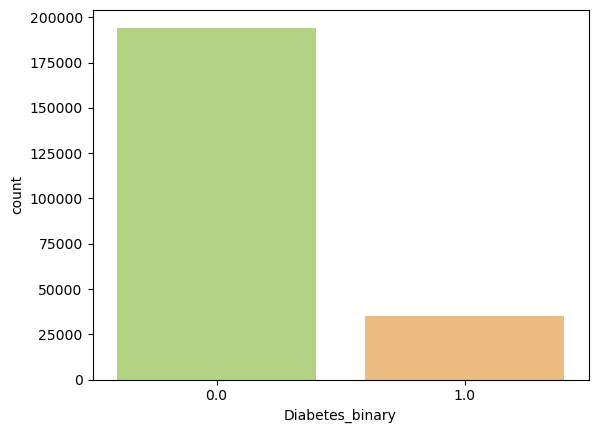

In [20]:
# Set consistent color palette

# Create a custom sequential color palette
palette = sns.color_palette("RdYlGn", n_colors=2)[::-1]

sns.set_palette(palette)

# Explore distribution of target variable
sns.countplot(x='Diabetes_binary', data=data)

In [21]:
discrete_var = ['HighBP','HighChol','CholCheck','Smoker','Stroke',
                'HeartDiseaseorAttack', 'Age', 'Sex','Education','Income', 
                'PhysActivity','Fruits', 'Veggies', 'HvyAlcoholConsump',
                'AnyHealthcare', 'NoDocbcCost','GenHlth', 'MentHlth', 
                'PhysHlth', 'DiffWalk']
#sns.countplot(x= 'Age', hue="Diabetes_012", data= diab)

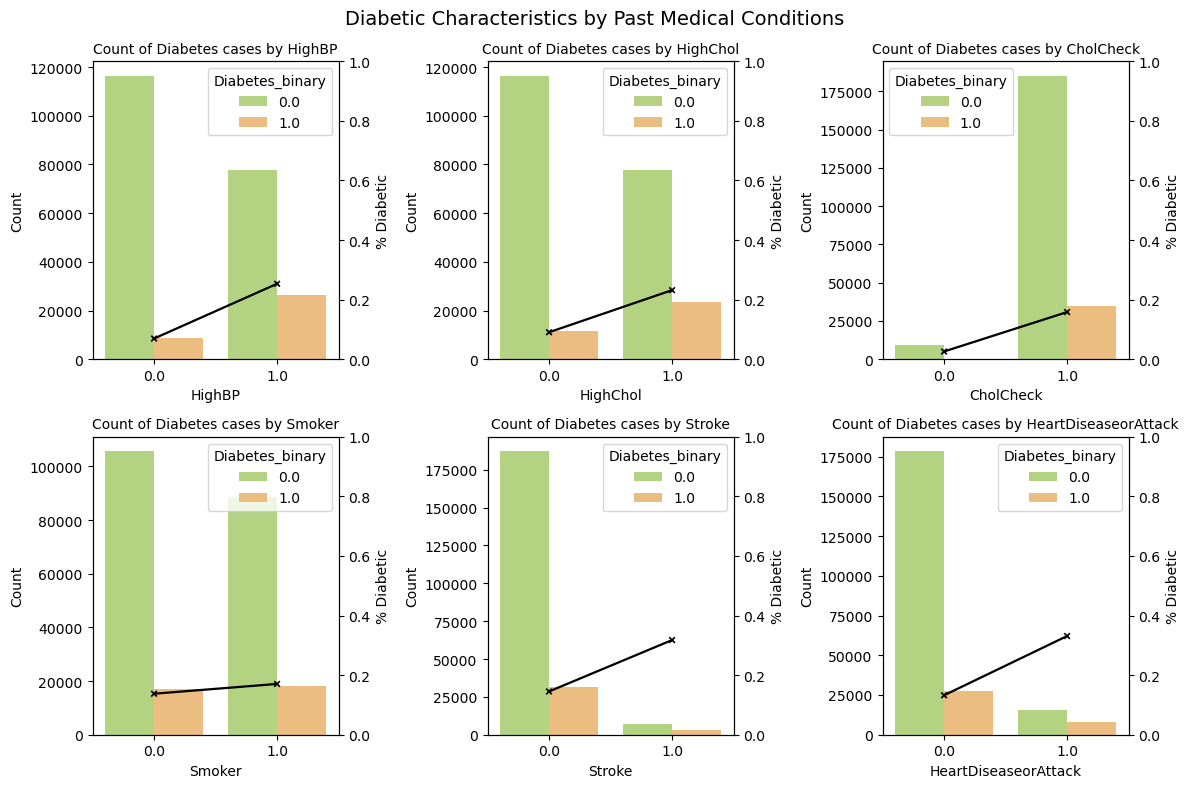

In [22]:
# create a new column with binary indicator variable for Diabetes_012
#data["Diabetes_binary"] = data["Diabetes_012"].apply(lambda x: 1 if x == 2 else 0)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Diabetic Characteristics by Past Medical Conditions", fontsize=14)
for i, var in enumerate(discrete_var[0:6]):
    ax = axes[i//3][i%3]
    sns.countplot(x=var, hue="Diabetes_binary", data=data, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.set_title("Count of Diabetes cases by "+var,fontdict={"fontsize": 10})
    ax2=ax.twinx()
    ax2 = sns.pointplot(x=var, y="Diabetes_binary", data=data.groupby(var).mean().reset_index(),color='black',markers='x',scale=0.6, ax=ax2)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% Diabetic", color='black')
plt.tight_layout()
plt.show()

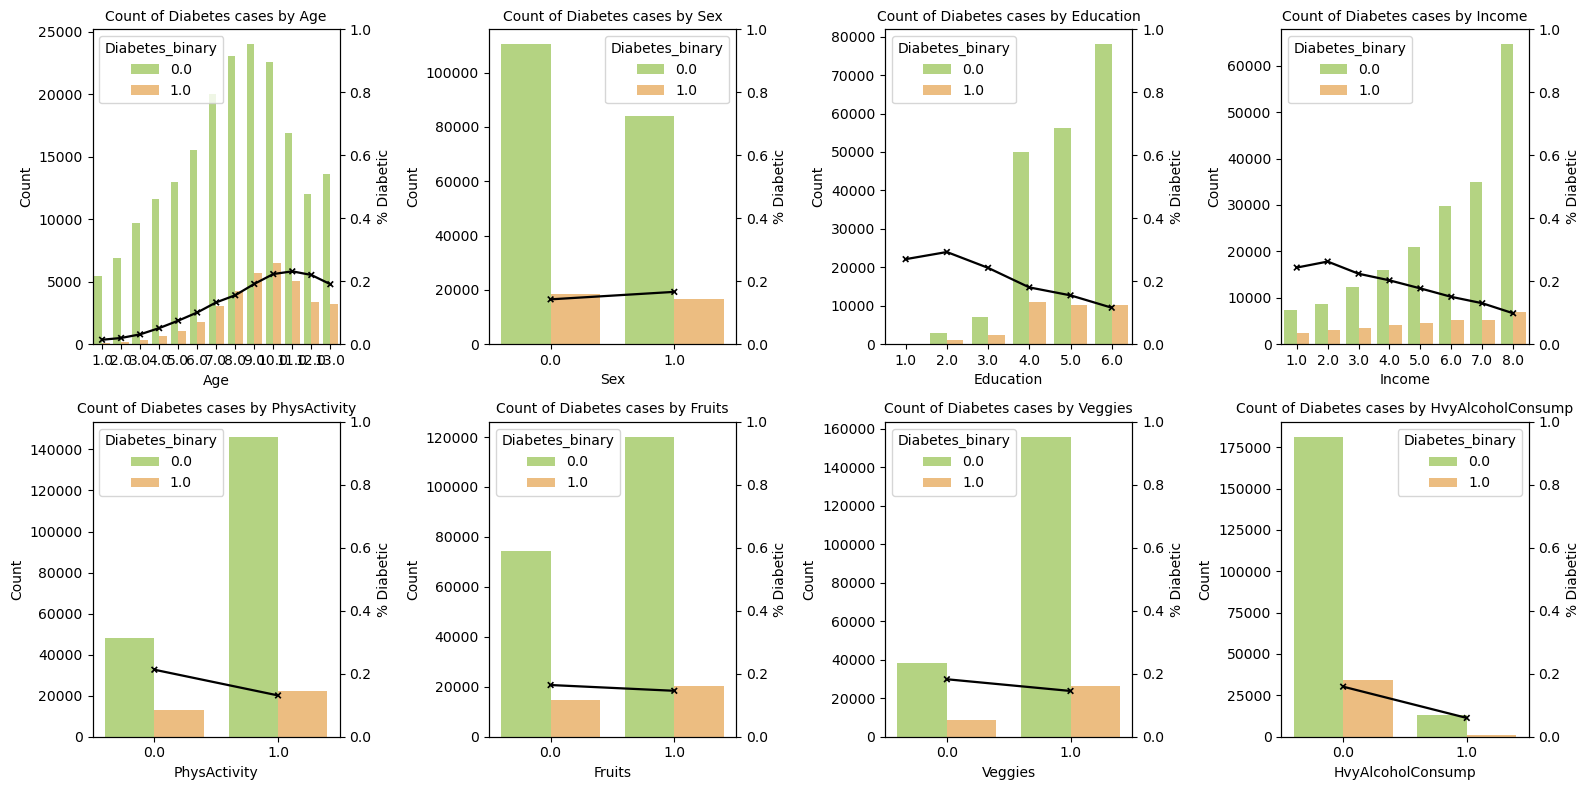

In [23]:
fig.suptitle("Diabetic Characteristics by Past Medical Conditions", fontsize=14)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, var in enumerate(discrete_var[6:14]):
    ax = axes[i//4][i%4]
    sns.countplot(x=var, hue="Diabetes_binary", data=data, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.set_title("Count of Diabetes cases by "+var,fontdict={"fontsize": 10})
    ax2=ax.twinx()
    ax2 = sns.pointplot(x=var, y="Diabetes_binary", data=data.groupby(var).mean().reset_index(),color='black',markers='x',scale=0.6, ax=ax2)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% Diabetic", color='black')
plt.tight_layout()
plt.show()

In [24]:
#Plots pipeline

In [25]:
def plots(df, x, y, axes, i):
    group = df.groupby(y)
    sns.histplot(data, x=x, ax=axes[i][0], kde=True, color='g')
    sns.histplot(data, x=x, hue=y, ax=axes[i][1], kde=True)
    sns.barplot(x=group[x].mean().index,
                y=group[x].mean(),
               ax=axes[i][2])
    
    for container in axes[i][2].containers:
        axes[i][2].bar_label(container, size=15, color='black')
        
    axes[i][3].pie(df[y].value_counts(),
                  labels = df[y].value_counts().index,
                  autopct='%0.2f%%')

In [26]:
def plot_class(df, y, nums):
    length = len(nums)
    fig, axes = plt.subplots(nrows=length, ncols=4, figsize=(25, 10))
    for i in range(length):
        plots(df,nums[i],y,axes,i)
        
    plt.suptitle("Histplots, barplots and pie charts grouped by {}".format(y),
                size=20)
        
    plt.tight_layout()
    plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [28]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Text(0.5, 1.0, 'correlation of feature')

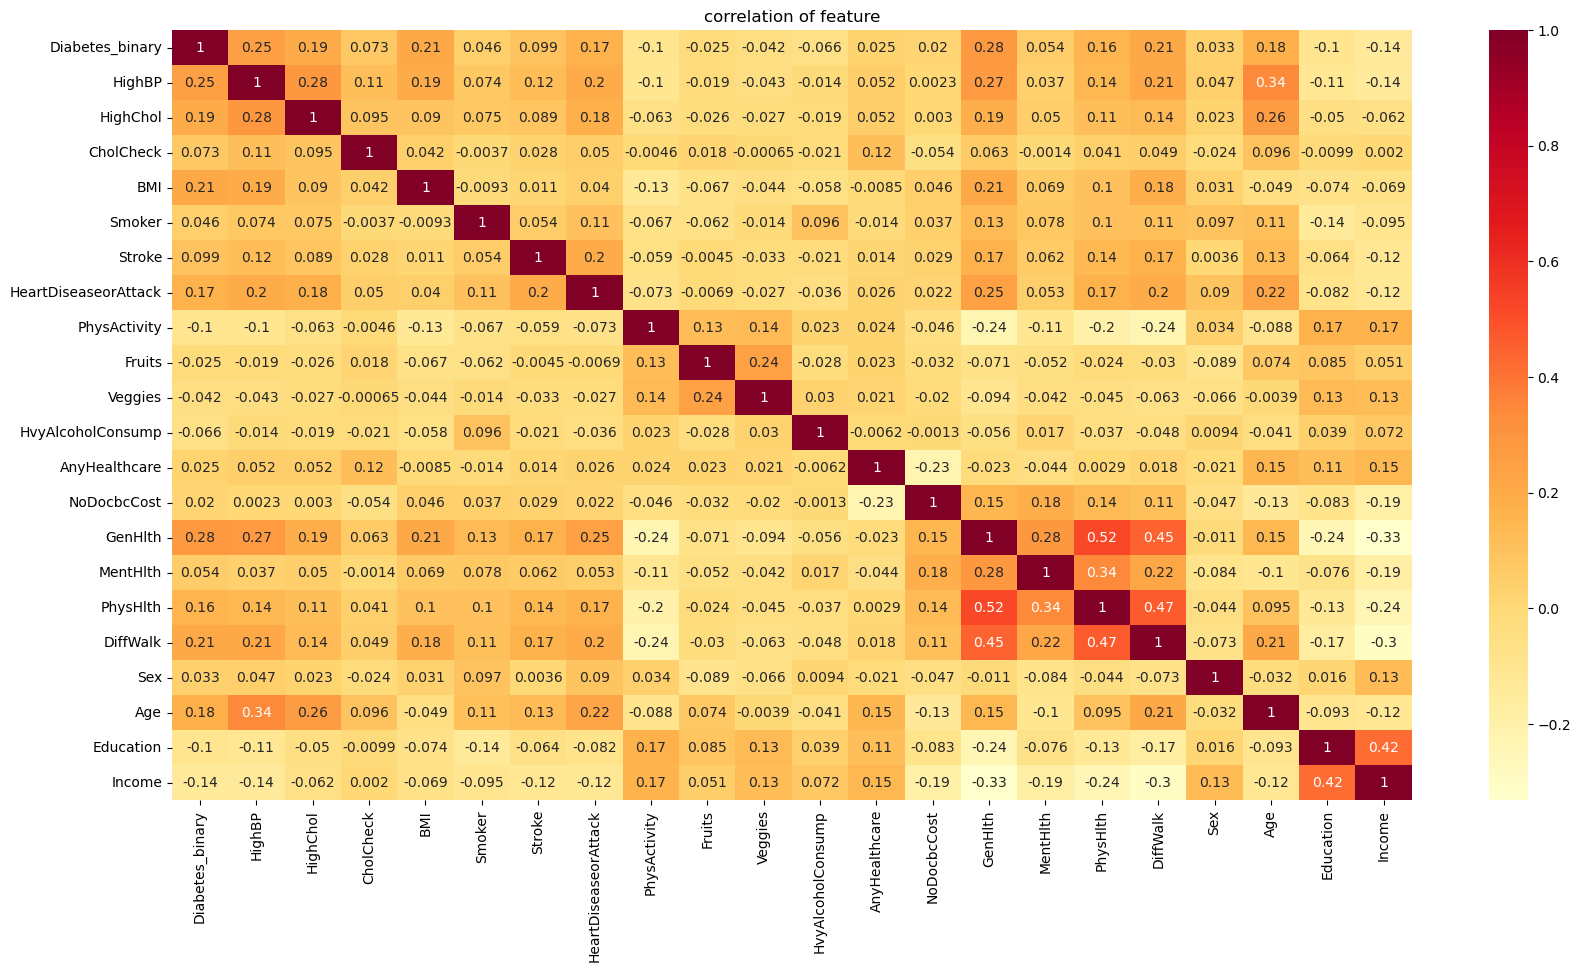

In [29]:

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

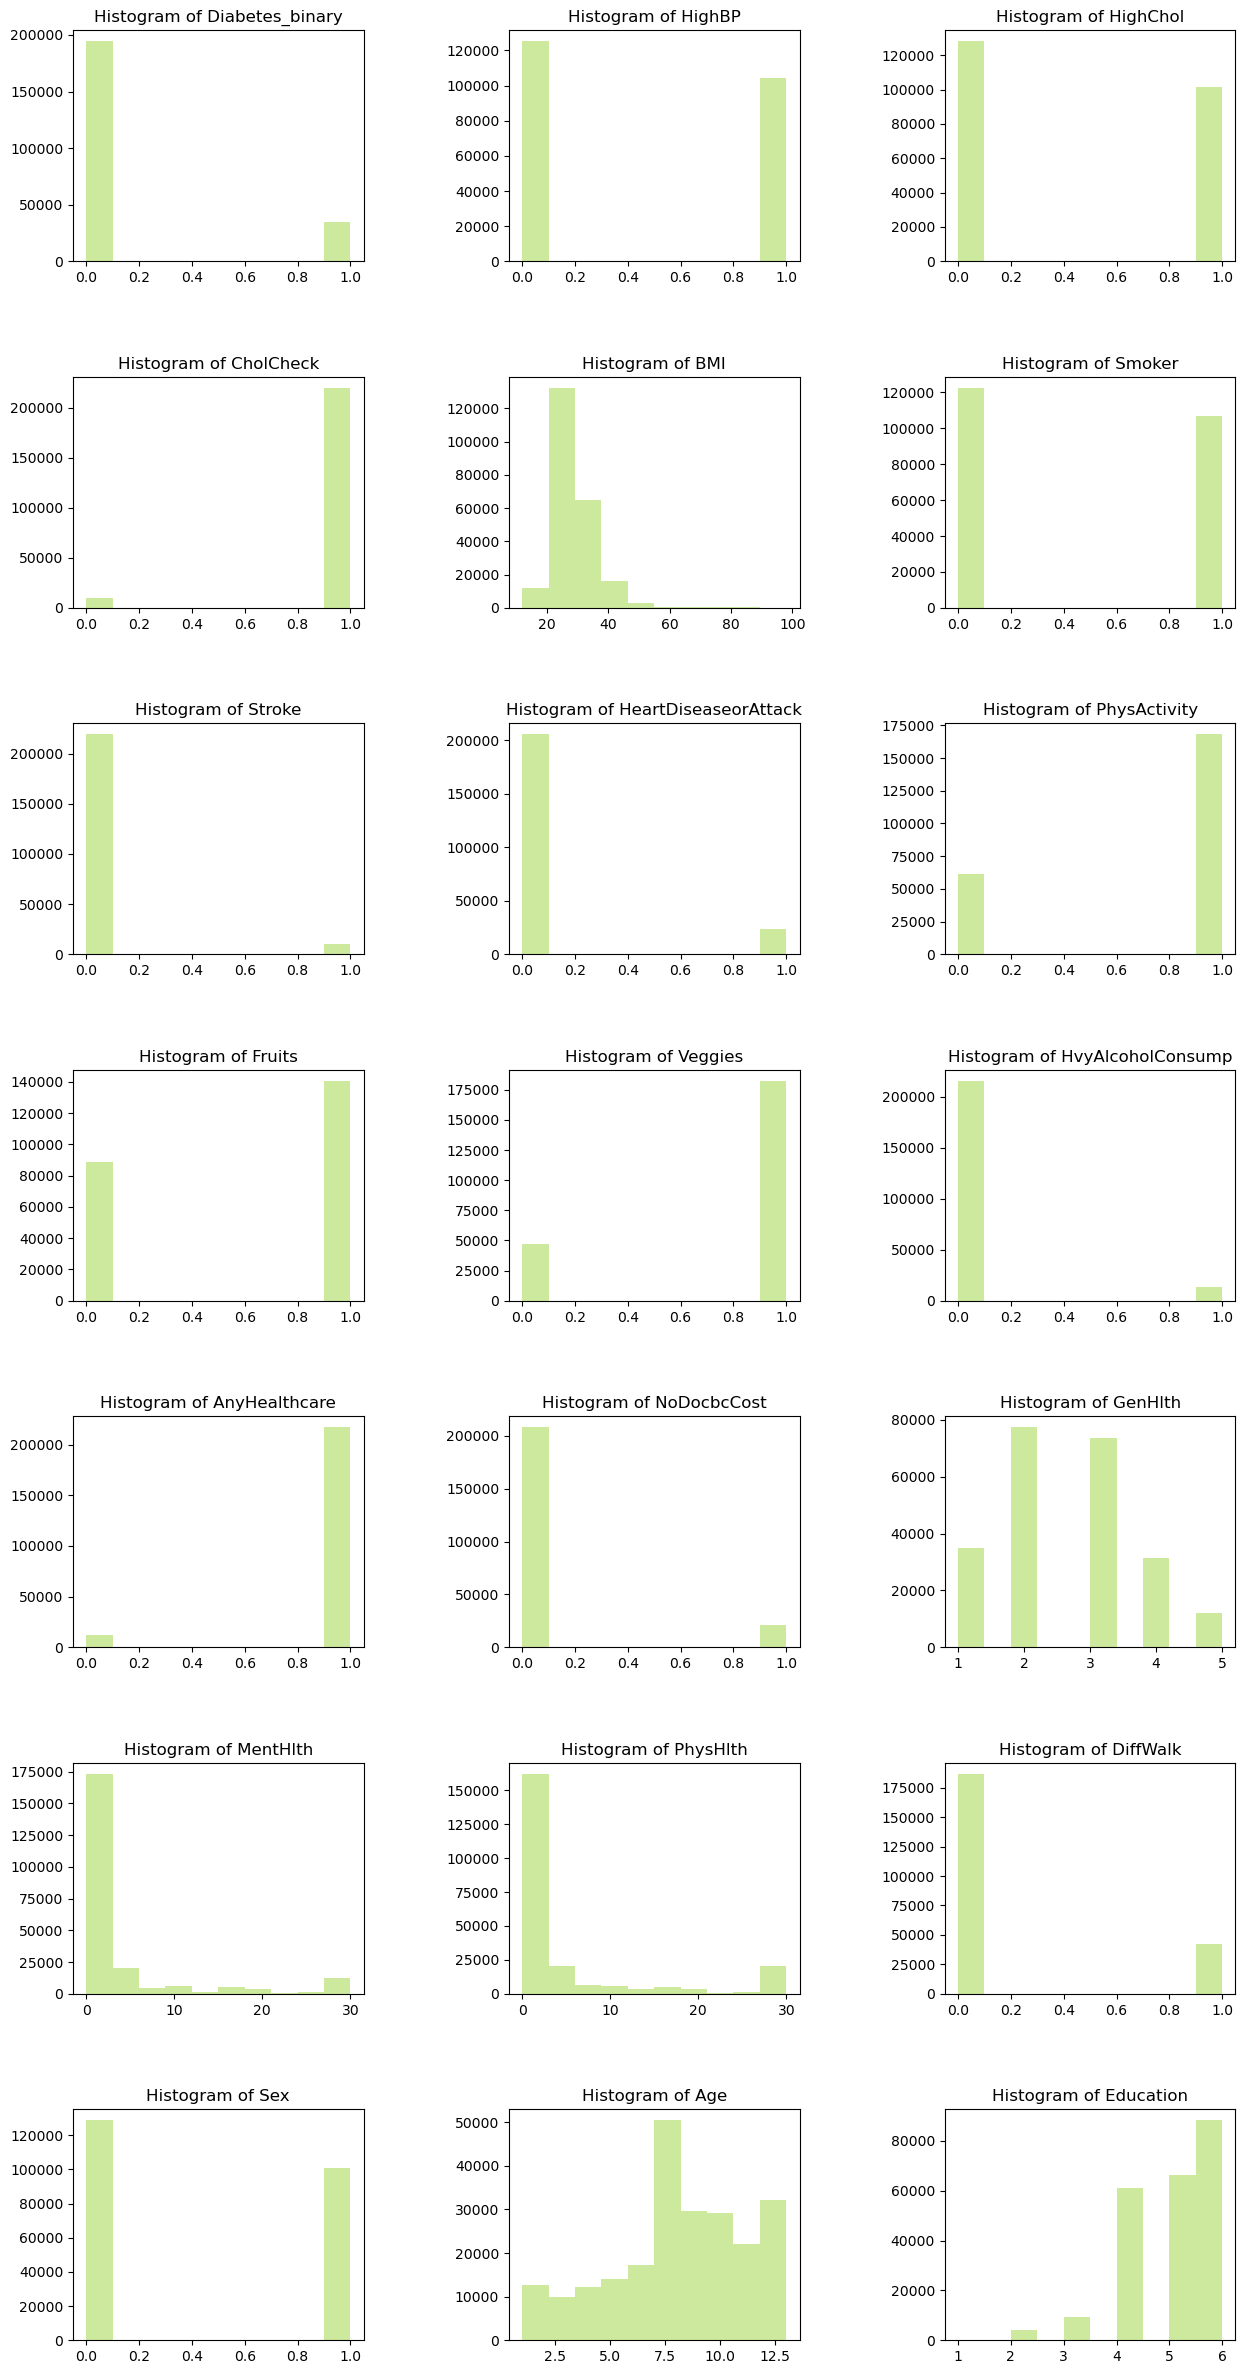

In [30]:
#Continuous variables distribution
var_ind = [x for x in range(0,22)]
plot = plt.figure(figsize = (15, 30))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 22):
    a = plot.add_subplot(7, 3, i)
    a.hist(data.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text('Histogram of ' + data.columns[var_ind[i - 1]])

In [31]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [32]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

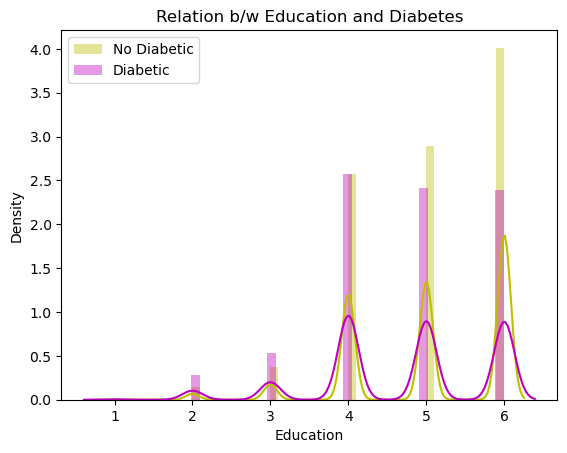

In [33]:


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()


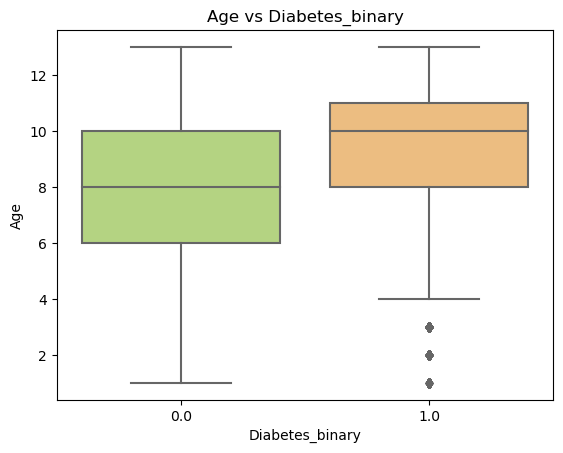

In [34]:
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary')
plt.show()

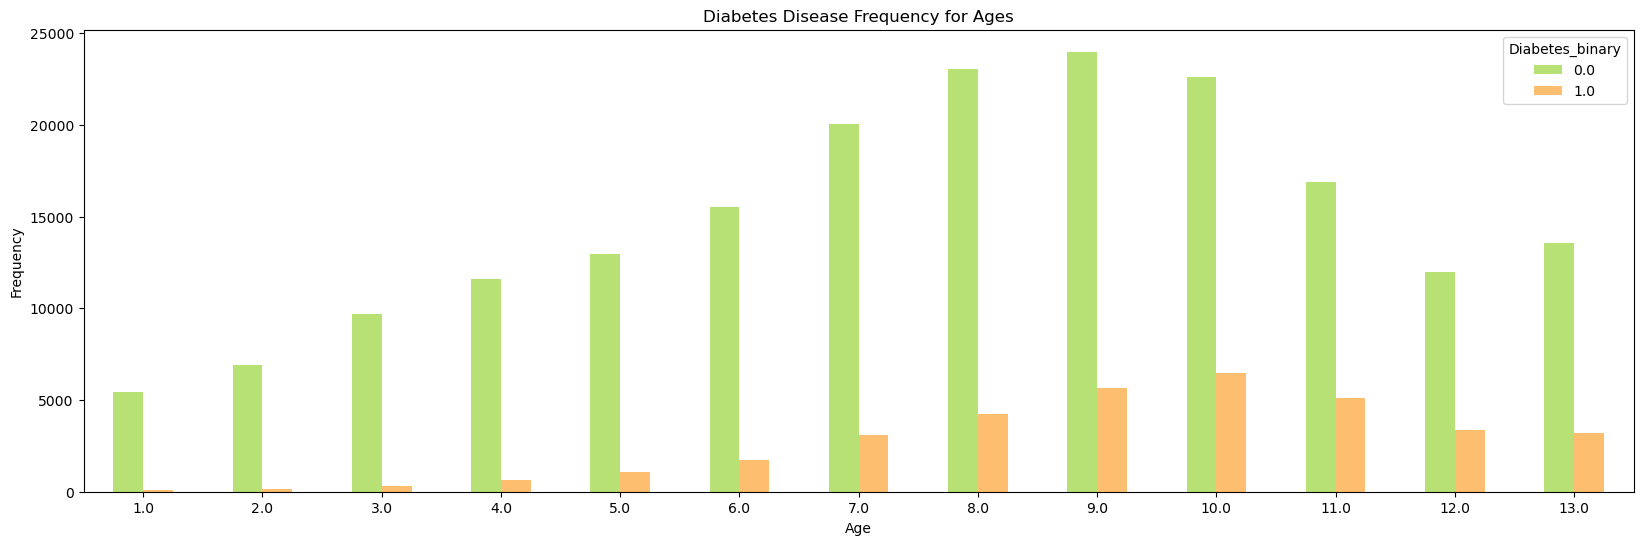

In [35]:
pd.crosstab(data.Age,data.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [36]:

def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(data)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   109.425291
Diabetes_binary           1.182154
HighBP                    1.315161
HighChol                  1.166374
CholCheck                 1.035970
BMI                       1.141796
Smoker                    1.076125
Stroke                    1.077944
HeartDiseaseorAttack      1.170400
PhysActivity              1.130550
Fruits                    1.097950
Veggies                   1.098136
HvyAlcoholConsump         1.027834
AnyHealthcare             1.109935
NoDocbcCost               1.135686
GenHlth                   1.741508
MentHlth                  1.221789
PhysHlth                  1.594308
DiffWalk                  1.513943
Sex                       1.076736
Age                       1.359039
Education                 1.272148
Income                    1.431806
dtype: float64


In [37]:
Y=data['Diabetes_binary']

In [38]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,const,0.000000
1,Diabetes_binary,194377.000000
2,HighBP,8098.548237
3,HighChol,4869.312739
4,CholCheck,48.904140
5,BMI,15507.736174
6,Smoker,253.826098
7,Stroke,2156.678382
8,HeartDiseaseorAttack,5822.145697
9,PhysActivity,617.563886


In [39]:
print(f_Scores.nlargest(19,'Score'))

                 Feature          Score
1        Diabetes_binary  194377.000000
17              PhysHlth   97988.761672
5                    BMI   15507.736174
16              MentHlth   11419.584750
20                   Age    8539.906340
2                 HighBP    8098.548237
18              DiffWalk    7875.496177
15               GenHlth    7671.732832
8   HeartDiseaseorAttack    5822.145697
3               HighChol    4869.312739
22                Income    3377.099257
7                 Stroke    2156.678382
12     HvyAlcoholConsump     937.401148
9           PhysActivity     617.563886
21             Education     479.112939
6                 Smoker     253.826098
19                   Sex     137.837135
14           NoDocbcCost      83.662830
11               Veggies      82.098846


In [40]:
colomns = [ "Sex" , "CholCheck" , "AnyHealthcare"]

In [41]:
data.drop(colomns , axis= 1 ,inplace=True)

In [42]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

In [43]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.3 , random_state=42)

In [44]:
# Initialize the models
from sklearn.ensemble import GradientBoostingClassifier
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    
}

In [45]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

In [47]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8507
Test set score: 0.8487


In [48]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58250
         1.0       0.53      0.14      0.22     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.56      0.57     68843
weighted avg       0.81      0.85      0.81     68843



DT=DecisionTreeClassifier()
DT.fit(X_train , Y_train)

In [50]:
# make predictions on test set
y_pred_dt=DT.predict(X_test)

print('Training set score: {:.4f}'.format(DT.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(DT.score(X_test, Y_test)))

Training set score: 0.9924
Test set score: 0.7769


In [51]:
matrix = classification_report(Y_test,y_pred_dt )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     58250
         1.0       0.29      0.32      0.31     10593

    accuracy                           0.78     68843
   macro avg       0.58      0.59      0.59     68843
weighted avg       0.78      0.78      0.78     68843



knn=KNeighborsClassifier()
knn.fit(X_train , Y_train)

In [53]:
# make predictions on test set
y_pred_knn=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8768
Test set score: 0.8308


In [54]:
matrix = classification_report(Y_test,y_pred_knn )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     58250
         1.0       0.40      0.21      0.27     10593

    accuracy                           0.83     68843
   macro avg       0.64      0.58      0.59     68843
weighted avg       0.80      0.83      0.81     68843



In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model


In [56]:
gb_model.fit(X_train, Y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)


In [60]:
matrix = classification_report(Y_test,y_pred_gb )
print(matrix)



              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58250
         1.0       0.57      0.16      0.24     10593

    accuracy                           0.85     68843
   macro avg       0.72      0.57      0.58     68843
weighted avg       0.82      0.85      0.81     68843

